In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
net = cv.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().splitlines()

In [3]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [4]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
img_path = os.path.join(os.pardir, os.pardir, os.pardir, 'img', 'classification', 'dog.jpg')
img = cv.imread(img_path)
img = cv.resize(img, None, fx=0.4, fy=0.3)

In [6]:
height, width, channels = img.shape
blob = cv.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

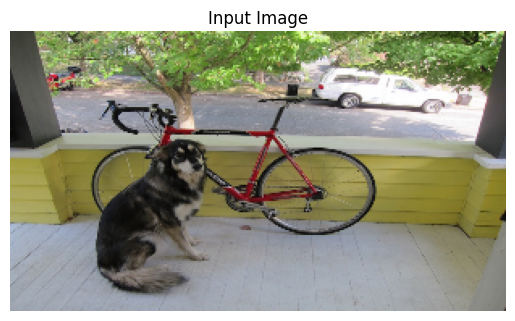

In [7]:
plt.figure()
plt.title('Input Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

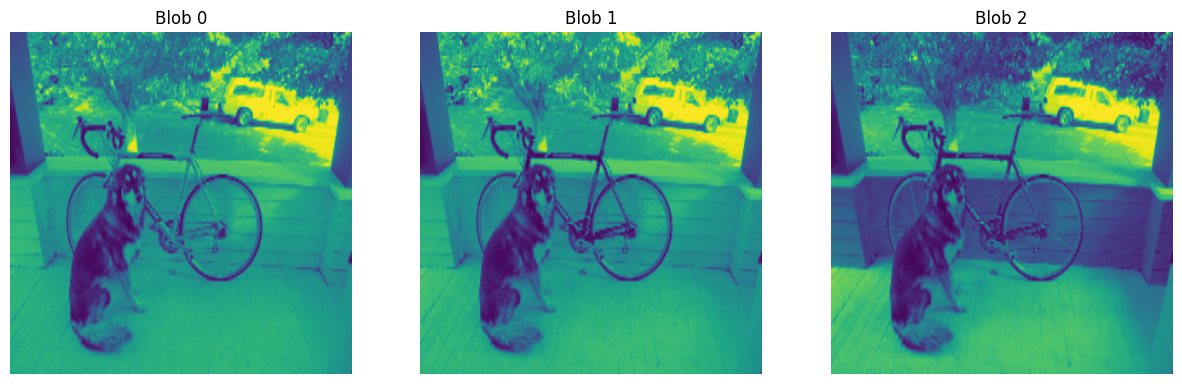

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for b in blob:
    for n, img_blob in enumerate(b):
        ax[n].set_title(f'Blob {n}')
        ax[n].imshow(img_blob)
        ax[n].axis('off')
plt.show()

In [9]:
net.setInput(blob)
outs = net.forward(output_layers)
outs[1]

array([[0.02118021, 0.02388128, 0.04664548, ..., 0.        , 0.        ,
        0.        ],
       [0.01726331, 0.01875123, 0.38844496, ..., 0.        , 0.        ,
        0.        ],
       [0.02118456, 0.01801863, 0.07650225, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97316355, 0.9751837 , 0.05149285, ..., 0.        , 0.        ,
        0.        ],
       [0.9797623 , 0.9754398 , 0.30574396, ..., 0.        , 0.        ,
        0.        ],
       [0.97900224, 0.9831845 , 0.08113787, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [10]:
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # rectangle co-ordinaters
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, w, h])  # put all rectangle areas
            confidences.append(float(confidence)) 
            # how confidence was that object detected and show that percentage
            class_ids.append(class_id)  # name of the object tha was detected

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.4, 0.6)

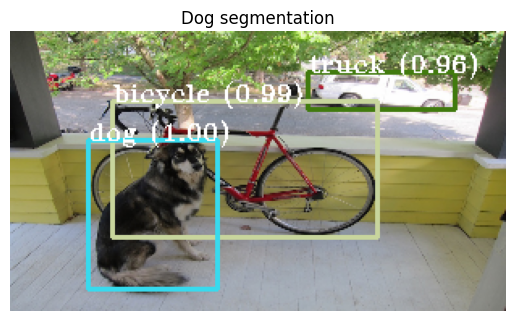

In [11]:
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = classes[class_ids[i]]
        color = colors[i]
        cv.rectangle(img, (x,y), (x + w, y + h), color, 2)
        cv.putText(img,  
           label + f' ({confidences[i]:.2f})',  
           (x, y),  
           fontFace=cv.FONT_HERSHEY_TRIPLEX,  
           fontScale=0.5,  
           color=(255, 255, 255)
        )

plt.figure()
plt.title('Dog segmentation')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()